In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
cnty_pops = pd.read_csv('WPP2019_TotalPopulationBySex.csv')[['Location', 'Variant', 'Time','PopTotal']].set_index('Variant')
cnty_pops = cnty_pops[cnty_pops['Time']==2050]
cnty_pops['PopTotal'] = cnty_pops['PopTotal'].apply(lambda x: x * 1000)

In [126]:
all_countries = [
    
    'Argentina', 'Australia', 'Bulgaria',
    'Belize', 'Brazil', 'Canada', 'Denmark',
    'France', 'Hungary', 'Kazakhstan',
    'Lithuania', 'Latvia', 'Paraguay',
    'Ukraine', 'Uruguay', 'United States of America',
    'Belarus', 'Botswana', 'Estonia',
    'Finland', 'Georgia', 'Iran', 'Libya',
    'Lesotho', 'Moldova', 'Mongolia',
    'Norway', 'New Zealand', 'Poland',
    'Portugal', 'Russia', 'Swaziland',
    'Tunisia',
    'United Arab Emirates', 'Belgium',
    'Brunei', 'Cyprus', 'Djibouti', 'Algeria',
    'Gambia', 'Iraq', 'Israel', 'Jordan',
    'Japan', 'South Korea', 'Kuwait',
    'Lebanon', 'Montenegro',
    'Mauritania', 'Netherlands', 'Saudi Arabia', 'Singapore', 'Trinidad and Tobago', 'Yemen',
    'Afghanistan', 'Angola', 'Burundi',
    'Bangladesh', 'Cameroon',
    'Democratic Republic of the Congo',
    'Republic of Congo', 'Dominican Republic', 'Egypt', 'Eritrea', 'Ethiopia',
    'Ghana', 'Guinea Bissau',
    'Guatemala', 'Haiti', 'India', 'Jamaica',
    'Kenya', 'Sri Lanka', 'Madagascar',
    'Mozambique', 'Malawi', 'Niger',
    'Nigeria', 'Nepal', 'Oman', 'Pakistan',
    'Philippines', 'Puerto Rico', 'North Korea', 'Rwanda', 'El Salvador',
    'Syria', 'Togo', 'Uganda',
    'Benin', 'Burkina Faso', 'Bolivia',
    'China', 'Ivory Coast', 'Colombia',
    'Costa Rica', 'United Kingdom',
    'Guinea', 'Honduras', 'Indonesia',
    'Ireland', 'Luxembourg', 'Mexico',
    'Malaysia', 'Panama', 'Sudan',
    'Senegal', 'Sierra Leone', 'Tajikistan',
    'Tanzania', 'Uzbekistan', 'Vietnam',
    'Zambia', 'Gabon', 'Equatorial Guinea',
    'Morocco', 'Peru',
    'Albania', 'Austria', 'Azerbaijan',
    'Bosnia and Herzegovina', 'Chile',
    'Czech Republic', 'Germany', 'Spain',
    'Greece', 'Croatia', 'Italy',
    'Kyrgyzstan', 'Laos', 'Macedonia',
    'Mali', 'Nicaragua', 'Papua New Guinea', 'Romania', 'Somalia',
    'Serbia', 'Slovakia', 'Slovenia',
    'Chad', 'Thailand', 'Turkmenistan',
    'East Timor', 'Turkey', 'Venezuela',
    'Armenia', 'Bhutan', 'Central African Republic', 'Switzerland', 'Cuba',
    'Ecuador', 'Guyana', 'Cambodia',
    'Liberia', 'Myanmar', 'Namibia',
    'Suriname', 'Sweden', 'South Africa',
    'Zimbabwe'
]

countries_names = pd.read_csv('country_names.csv',encoding='latin-1').rename({'Country Code': 'ISO3'}, axis=1)
countries_names = countries_names.iloc[[e in all_countries for e in list(countries_names['name'].values)], :]
countries_names.loc[countries_names['nev_admin_name']=='Iran', 'fao_producer_prices_name'] = 'Iran (Islamic Republic of)'
countries_names.loc[countries_names['nev_admin_name']=='Swaziland', 'fao_producer_prices_name'] = 'Eswatini'
countries_names.loc[countries_names['nev_admin_name']=='Republic of Congo', 'fao_producer_prices_name'] = 'Congo'
countries_names.loc[countries_names['nev_admin_name']=="North Korea", 'fao_producer_prices_name'] = "Dem. People's Republic of Korea"
countries_names.loc[countries_names['nev_admin_name']=="Syria", 'fao_producer_prices_name'] = "Syrian Arab Republic"
countries_names.loc[countries_names['nev_admin_name']=="Ivory Coast", 'fao_producer_prices_name'] = "Cote d'Ivoire"
countries_names.loc[countries_names['nev_admin_name']=="Czech Republic", 'fao_producer_prices_name'] = "Czechia"
countries_names.loc[countries_names['nev_admin_name']=="Macedonia", 'fao_producer_prices_name'] = "North Macedonia"
countries_names.loc[countries_names['nev_admin_name']=="East Timor", 'fao_producer_prices_name'] = "Timor-Leste"

countries_names.head()

,id,ISO3,adm0_a3,name,nev_admin_name,fao_producer_prices_name,nev_name,nev_name_long,sovereignt,base_id,...,iana_internet,un_vehicle,ioc_olympic,un_iso_numeric,itu_calling,UNI,UNDP,FAOSTAT,GAU,FAOSTAT_augmented
1,2,AFG,AFG,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,1,...,.af,AFG,AFG,4.0,93,4.0,AFG,2.0,1.0,2
2,3,AGO,AGO,Angola,Angola,Angola,Angola,Angola,Angola,2,...,.ao,NaN,ANG,24.0,244,24.0,ANG,7.0,8.0,7
4,5,ALB,ALB,Albania,Albania,Albania,Albania,Albania,Albania,4,...,.al,AL,ALB,8.0,355,8.0,ALB,3.0,3.0,3
7,8,ARE,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,7,...,.ae,NaN,UAE,784.0,971,784.0,UAE,225.0,255.0,225
8,9,ARG,ARG,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,8,...,.ar,RA,ARG,32.0,54,32.0,ARG,9.0,12.0,9


In [157]:
variants = ['Low', 'Medium', 'High', 'Constant fertility', 'Instant replacement', 'Baseline','Zero migration', 'Constant mortality', 'No change']
values = [1.45, 1.585, 1.723, 1.716, 1.533, 1.585, 1., 1.519, 1.644, 1.485]
countries = pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3']

for country in countries:
    for i, var in enumerate(variants):
        if var!='Baseline':
            try:
                print(country)
                new_name = countries_names[countries_names['ISO3']==country].name.values[0]
                print(cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var])
                print(new_name)
            except:
                try:
                    new_name = countries_names[countries_names['ISO3']==country].fao_producer_prices_name.values[0]
                    print(new_name)
                    print(cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var])
                except:
                    print(get_population(df[df.ISO3==country]) * values[i])

AFG
58806301.0
Afghanistan
AFG
64682975.99999999
Afghanistan
AFG
70700226.0
Afghanistan
AFG
88194727.0
Afghanistan
AFG
55631155.99999999
Afghanistan
AFG
67615193.0
Afghanistan
AFG
61703371.0
Afghanistan
AFG
83984093.00000001
Afghanistan
AGO
71514179.0
Angola
AGO
77420355.0
Angola
AGO
83477134.0
Angola
AGO
92284496.99999999
Angola
AGO
48958733.0
Angola
AGO
77455769.0
Angola
AGO
73295696.0
Angola
AGO
87256832.0
Angola
ALB
2212989.0
Albania
ALB
2424052.0
Albania
ALB
2644782.0
Albania
ALB
2487765.0
Albania
ALB
2750386.0
Albania
ALB
2775825.0
Albania
ALB
2320047.0
Albania
ALB
2383369.0
Albania
ARE
9433626.0
United Arab Emirates
ARE
10425284.0
United Arab Emirates
ARE
11423616.000000002
United Arab Emirates
ARE
10589743.0
United Arab Emirates
ARE
12051806.0
United Arab Emirates
ARE
10624306.999999998
United Arab Emirates
ARE
10153883.0
United Arab Emirates
ARE
10317747.0
United Arab Emirates
ARG
49970333.0
Argentina
ARG
54867248.0
Argentina
ARG
59953198.0
Argentina
ARG
57215864.0
Argentina
A

178308417.0
Egypt
EGY
137335723.0
Egypt
EGY
161372723.0
Egypt
EGY
155999861.0
Egypt
EGY
174115856.00000003
Egypt
ERI
5477519.0
Eritrea
ERI
6005491.999999999
Eritrea
ERI
6545581.999999999
Eritrea
ERI
7139039.000000001
Eritrea
ERI
4764135.0
Eritrea
ERI
6431589.0
Eritrea
ERI
5734222.0
Eritrea
ERI
6820779.0
Eritrea
ESP
40486310.0
Spain
ESP
43637407.99999999
Spain
ESP
46823600.99999999
Spain
ESP
42512622.0
Spain
ESP
47989185.99999999
Spain
ESP
42126509.00000001
Spain
ESP
41845595.0
Spain
ESP
40723562.99999999
Spain
EST
1068463.0
Estonia
EST
1158412.0
Estonia
EST
1249452.0
Estonia
EST
1136506.0
Estonia
EST
1240222.0
Estonia
EST
1198018.0
Estonia
EST
1100201.0
Estonia
EST
1078351.9999999998
Estonia
ETH
187298650.0
Ethiopia
ETH
205410671.0
Ethiopia
ETH
224003323.0
Ethiopia
ETH
258971536.99999997
Ethiopia
ETH
168739765.0
Ethiopia
ETH
205880604.0
Ethiopia
ETH
195495561.00000003
Ethiopia
ETH
246189628.0
Ethiopia
FIN
5054018.0
Finland
FIN
5486151.999999999
Finland
FIN
5926750.0
Finland
FIN
5515400

Libya
LBY
8596253.0
Libya
LBY
8261338.0
Libya
LBY
8816981.0
Libya
LKA
19825301.0
Sri Lanka
LKA
21813964.0
Sri Lanka
LKA
23863585.0
Sri Lanka
LKA
22841100.0
Sri Lanka
LKA
22159978.0
Sri Lanka
LKA
25010048.0
Sri Lanka
LKA
20924584.0
Sri Lanka
LKA
21944863.999999996
Sri Lanka
LSO
2396166.0
Lesotho
LSO
2665265.0
Lesotho
LSO
2946745.9999999995
Lesotho
LSO
3001475.9999999995
Lesotho
LSO
2403536.0
Lesotho
LSO
2939037.0000000005
Lesotho
LSO
2416265.0
Lesotho
LSO
2728329.0
Lesotho
LTU
1957597.0000000002
Lithuania
LTU
2121388.0
Lithuania
LTU
2287241.0
Lithuania
LTU
2094726.0
Lithuania
LTU
2251337.9999999995
Lithuania
LTU
2325288.9999999995
Lithuania
LTU
2004245.0
Lithuania
LTU
1977678.9999999998
Lithuania
LUX
728041.9999999999
Luxembourg
LUX
789943.0
Luxembourg
LUX
852793.0
Luxembourg
LUX
783263.0
Luxembourg
LUX
871305.0
Luxembourg
LUX
620111.0
Luxembourg
LUX
763218.0000000001
Luxembourg
LUX
756560.0
Luxembourg
LVA
1363398.0
Latvia
LVA
1479176.0000000002
Latvia
LVA
1597247.0
Latvia
LVA
1465312.0

28764134.3
SDS
31442174.39
SDS
34179726.482
SDS
34040865.144
SDS
30410633.022
SDS
19837334.0
SDS
30132910.345999997
SDS
32612577.095999997
SEN
30561310.0
Senegal
SEN
33186850.0
Senegal
SEN
35865125.0
Senegal
SEN
38782102.99999999
Senegal
SEN
23990861.0
Senegal
SEN
34004996.0
Senegal
SEN
31954241.0
Senegal
SEN
37325586.0
Senegal
SGP
5961291.0
Singapore
SGP
6407528.0
Singapore
SGP
6861698.0
Singapore
SGP
6309363.0
Singapore
SGP
7245271.0
Singapore
SGP
5430563.0
Singapore
SGP
6145781.999999999
Singapore
SGP
6047748.000000001
Singapore
SLE
11767094.0
Sierra Leone
SLE
12944875.0
Sierra Leone
SLE
14160990.0
Sierra Leone
SLE
16383295.0
Sierra Leone
SLE
10945171.0
Sierra Leone
SLE
13096784.0
Sierra Leone
SLE
11949931.0
Sierra Leone
SLE
15088621.000000002
Sierra Leone
SLV
6216814.0
El Salvador
SLV
6936791.999999999
El Salvador
SLV
7693030.0
El Salvador
SLV
7350416.0
El Salvador
SLV
7415996.0
El Salvador
SLV
7918234.0
El Salvador
SLV
6671056.0
El Salvador
SLV
7078656.0
El Salvador
SOL
3655299.19

In [129]:
# importing requirements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import operator

In [130]:
# !pip3 install geopandas
import geopandas as gpd
import_indep = gpd.read_file('shp_trade_dep.gpkg')
imports_data = import_indep[['cntry', 'admin','country','yr2013']]
imports_data.head()

,cntry,admin,country,yr2013
0,None,Saint Barthelemy,None,NaN
1,None,Jersey,None,NaN
2,None,Ashmore and Cartier Islands,None,NaN
3,None,Siachen Glacier,None,NaN
4,None,Indian Ocean Territories,None,NaN


In [131]:
# merge import with country_names to add ISO3 columns

imports = imports_data.merge(countries_names[['ISO3', 'name']], left_on='admin', right_on='name', how='right')
imports.head()

,cntry,admin,country,yr2013,ISO3,name
0,Armenia,Armenia,Armenia,0.124763,ARM,Armenia
1,Australia,Australia,Australia,1.000000,AUS,Australia
2,India,India,India,0.493093,IND,India
3,Indonesia,Indonesia,Indonesia,0.806717,IDN,Indonesia
4,Iran (Islamic Republic of),Iran,Iran (Islamic Republic of),0.209009,IRN,Iran


In [132]:
data_path = 'outputs/compare/'
df = pd.read_csv(data_path+'ssp1_compare_new.csv')
df.head()

,pixel_id,%cropland_2000,%cropland_2050,cal_per_ha_pred,cal_per_ha_2000,delta_cal_per_ha,%delta_cal_per_ha,ha_per_pixel,population_2000,population_2050,calories_2000,calories_2050,delta_cal,%delta_cal,country_id,base_id,ISO3,name,sovereignt
0,330087,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
1,330088,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
2,330089,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
3,330090,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
4,334378,0.0,NaN,NaN,NaN,NaN,NaN,961.741882,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark


In [133]:
diet_2000 = pd.read_csv('Consumption_2000_FAOSTAT.csv')
LS_2000_df = diet_2000[diet_2000['Item']=='Animal Products'][['Country','Value']].merge(countries_names[['name','ISO3']].drop_duplicates(), right_on='name',left_on='Country',how='left')
# kcal/capita/day to cal/capita
LS_2000_df['LS2000_percapita'] = LS_2000_df['Value'].apply(lambda x:x*1e3*365.25)
LS_2000_df.head()

,Country,Value,name,ISO3,LS2000_percapita
0,Afghanistan,275,Afghanistan,AFG,100443750.0
1,Albania,674,Albania,ALB,246178500.0
2,Algeria,277,Algeria,DZA,101174250.0
3,Angola,153,Angola,AGO,55883250.0
4,Antigua and Barbuda,701,NaN,NaN,256040250.0


In [136]:
# function that returns the population from a dataframe by year
def get_population(X, year=2050):
    return int(X['population_'+str(year)].sum())

# function that returns the total production from a dataframe by year
def get_production(X, year=2050):
    return X['calories_'+str(year)].sum()

# function that calculates the caloric sufficiency. it is fed by a dataframe [to preserve generality]
def cal_suff(X, cntry=None, year=2050, food_waste=.19, diet=.19, feed_food_factor=2.3, population = None, pop_fact=1., ADER=2320*1e3*365.25):
    
    
    conso = 1-food_waste
    ratio = 1 + .52/.29
    perc_feed = conso / ratio
    perc_food = perc_feed * (ratio-1)
    
    prod = get_production(X, year=year)
    food = perc_food * prod
    feed_now_food = 0.
    if cntry in LS_2000_df.ISO3.unique():
        LS = LS_2000_df[LS_2000_df.ISO3==cntry]['LS2000_percapita'].values[0] * get_population(X, year=2000)
        
    else:
        LS = (1.1483e15*1e3)  * get_population(X, year=2000) / 5976296907.
    if year==2050:
        LS_2000 = LS
        LS = diet * (food + feed_food_factor * LS_2000) / (1 + diet * (feed_food_factor - 1))
        feed_now_food = feed_food_factor * (LS_2000 - LS)
    
    production = food + LS + feed_now_food
    if population:
        demand = population * ADER
    else:
        demand = get_population(X, year=year) * pop_fact * ADER
    
    return production/demand

cal_suff(df[df.ISO3=='USA'], cntry='USA', year=2050)

3.9091551347024596

In [137]:
def custom_categorization_new(row):
    
    if row['calSuff2000'] > 3 and row['trade'] > 0.8: 
        return 'Exporters' # e.g Brazil, USA, France, Denmark (Greenland)
    
    elif (row['delta_CalSuff_avg'] > 0.6 and row['delta_consistency'] >= 3) or (row['calSuff2000'] > 1.2 and row['delta_consistency'] >= 3 and row['delta_CalSuff_avg'] > 0.2):
        return 'Increasing sufficiency'
    
    elif row['trade'] < 0.1:
        return 'Importers'
    
    elif row['calSuff2000'] < 1.2 and (row['delta_consistency'] <= 1 or row['highest_ssp'] < 0.9):
        return 'Most vulnerable'
    
    elif (row['lowest_ssp'] < 1 or row['calSuff2000'] < 2) and row['delta_CalSuff_avg'] < -0.2 and row['delta_consistency'] <= 1:
        return 'Newly vulnerable'
    
    elif row['calSuff2000'] < 1.2 and row['delta_consistency'] >= 2 and row['lowest_ssp'] > 0.9*row['calSuff2000']:
        return 'Vulnerable but improving'
    
    elif row['delta_consistency'] <= 2 and row['delta_CalSuff_avg'] < -0.1 and row['calSuff2000'] > 2:
        return 'Decreasing but not as vulnerable'
    
    elif row['delta_consistency'] > 0 and row['delta_consistency'] < 4:
        return 'Highly variable'  
    
    return 'Outliers'

In [378]:
header = [
    'Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
            'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

variants = ['Low', 'Momentum', 'Constant mortality', 'Instant replacement', 'Baseline', 'Medium', 'Zero migration', 'No change', 'Constant fertility', 'High']
values = [1.45, 1.519, 1.533, 1., 1.585, 1.585, 1.644, 1.716, 1.723]
diets = [.23, .21, .19, .20, .23]
suffices = []
all_counts = []
cnty_diets = pd.read_csv('pctLS_SSPs_Bodirsky.csv', sep=';')[['Scenario', 'Region', '2050', '2000']].set_index('Scenario')


cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

pivot_cols = ['value', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Highly variable',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Highly variable',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Highly variable',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Highly variable',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Highly variable',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving']
stacked_df = pd.DataFrame(columns=pivot_cols)
countries = pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3']


for var in list(variants):

    suffies = pd.DataFrame(columns=['ISO3', 'calSuff2000', 'ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])
    suffies['ISO3'] = countries
    
    for country in list(countries):
        my_diet = cnty_diets[cnty_diets['Region']==country]['2000'].mean()
        suffies.loc[suffies.ISO3==country, 'calSuff2000'] = cal_suff(df[df.ISO3==country], cntry=country, year=2000)
    suffies['calSuff2000'] = suffies.calSuff2000.astype('float')

    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        for country in list(countries):
            try:
                my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
            except:
                my_diet = diets[i]
            
            if var!='Baseline':
                try:
                    new_name = countries_names[countries_names['ISO3']==country].name.values[0]
                    pop = cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var]
                except:
                    try:
                        new_name = countries_names[countries_names['ISO3']==country].fao_producer_prices_name.values[0]
                        pop = cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var]
                    except:
                        pop = get_population(df[df.ISO3==country]) * values[i]
                suffies.loc[suffies.ISO3==country, 'ssp'+str(i+1)] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                  year=2050, diet=my_diet, population=pop)
                
            else:
                suffies.loc[suffies.ISO3==country, 'ssp'+str(i+1)] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                  year=2050, diet=my_diet)

        suffies['ssp'+str(i+1)] = suffies['ssp'+str(i+1)].astype('float')

    suffies['delta_consistency'] = -1
    for i, country in suffies.iterrows():
        state = -1
        val_2000 = country['calSuff2000']   
        down = 0
        up = 0
        num_nan = 0
        for ssp in ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']:
            if (country[ssp] == np.nan) or (val_2000 == np.nan):
                num_nan += 1
            # not significant if not change of 0.1 unit of sufficiency
            # 2050 pred less than 2000 sufficiency
            elif country[ssp] - val_2000 < -0.1:
                down += 1
            # 2050 pred more than 2000 sufficinecy
            elif country[ssp] - val_2000 >= 0.1:
                up += 1

        # Compare diff values
        # Case 
        if up == 5 - num_nan: state = 4     #4: up all scenarios
        elif down == 5 - num_nan: state = 0    #0: down all scenarios
        elif up == 4 - num_nan: state = 3     #3: up most
        elif down == 4 - num_nan: state = 1    #1: down most
        else: state = 2     #2: variable (Pink)

        suffies.at[i, 'delta_consistency'] = state
    
    suffies = suffies.merge(imports, on='ISO3').drop(['admin', 'country', 'cntry'], axis=1)
    suffies = suffies.rename({'yr2013': 'trade'}, axis=1)
    suffies.dropna(subset=['trade','ssp1','ssp2','ssp3','ssp4','ssp5'])  

    
    # Singapore
    suffies.loc[suffies[suffies['ISO3'] == 'SGP'].index, 'trade'] = 0.05

    
    suffies['avg_new_suff'] = (suffies['ssp1']
                                      +suffies['ssp2']
                                      +suffies['ssp3']
                                      +suffies['ssp4']
                                      +suffies['ssp5'])/5

    suffies['delta_CalSuff_avg'] = suffies['avg_new_suff'] - suffies['calSuff2000']

    suffies['delta_max'] = np.nan
    for i, row in suffies.iterrows():
        # (signed change, absolute change)
        changes = list([(row['ssp1'] - row['calSuff2000'], abs(row['ssp1'] - row['calSuff2000'])),
                        (row['ssp2'] - row['calSuff2000'], abs(row['ssp2'] - row['calSuff2000'])),
                        (row['ssp3'] - row['calSuff2000'], abs(row['ssp3'] - row['calSuff2000'])),
                        (row['ssp4'] - row['calSuff2000'], abs(row['ssp4'] - row['calSuff2000'])),
                        (row['ssp5'] - row['calSuff2000'], abs(row['ssp5'] - row['calSuff2000']))])
        # take signed change where absolute change is max
        suffies.loc[i, 'delta_max'] = max(changes, key=operator.itemgetter(1))[0]



    suffies['lowest_ssp'] = np.nan
    for i, row in suffies.iterrows():
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'lowest_ssp'] = min(changes)


    suffies['highest_ssp'] = np.nan
    for i, row in suffies.iterrows():    
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'highest_ssp'] = max(changes)

    
    suffies['category'] = suffies.apply(lambda row: custom_categorization_new(row), axis=1)
    suffices.append(suffies)
    
    inters = pd.DataFrame(suffies.groupby('category')['ISO3'].apply(list))
    all_counts.append(inters)
    counts = suffies.groupby('category').count()['calSuff2000'].reset_index().rename({'calSuff2000':'count'}, axis=1)
    means = suffies.groupby('category').mean()[['ssp1','ssp2','ssp3','ssp4','ssp5']]
    suffice = pd.merge(counts, means, on='category').reset_index()
    
    
    suffice['value'] = var
    df_pivot = suffice.pivot(index='value', columns='category')
    df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
    stacked_df = pd.concat([stacked_df, df_pivot.reset_index()])
    
        
    try:
        cat1.append(suffice[suffice['category'] == 'Exporters']['count'].values[0])
    except:
        cat1.append(0)
    try:
        cat2.append(suffice[suffice['category'] == 'Increasing sufficiency']['count'].values[0])
    except:
        cat2.append(0)
    try:
        cat3.append(suffice[suffice['category'] == 'Importers']['count'].values[0])
    except:
        cat3.append(0)
    try:
        cat4.append(suffice[suffice['category'] == 'Most vulnerable']['count'].values[0])
    except:
        cat4.append(0)
    try:
        cat5.append(suffice[suffice['category'] == 'Newly vulnerable']['count'].values[0])
    except:
        cat5.append(0)
    try:
        cat6.append(suffice[suffice['category'] == 'Vulnerable but improving']['count'].values[0])
    except:
        cat6.append(0)
    try:
        cat7.append(suffice[suffice['category'] == 'Decreasing but not as vulnerable']['count'].values[0])
    except:
        cat7.append(0)
    try:
        cat8.append(suffice[suffice['category'] == 'Highly variable']['count'].values[0])
    except:
        cat8.append(0)
    try:
        cat9.append(suffice[suffice['category'] == 'Outliers']['count'].values[0])
    except:
        cat9.append(0)

In [379]:
cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9

([16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
 [16, 13, 14, 12, 17, 13, 12, 13, 13, 11],
 [22, 22, 22, 22, 21, 22, 22, 22, 22, 22],
 [39, 38, 39, 39, 35, 39, 39, 40, 41, 40],
 [27, 27, 28, 29, 24, 30, 31, 34, 36, 37],
 [2, 5, 3, 4, 4, 2, 1, 2, 1, 1],
 [21, 29, 25, 29, 28, 23, 23, 21, 19, 23],
 [17, 10, 13, 9, 15, 15, 16, 12, 12, 10],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

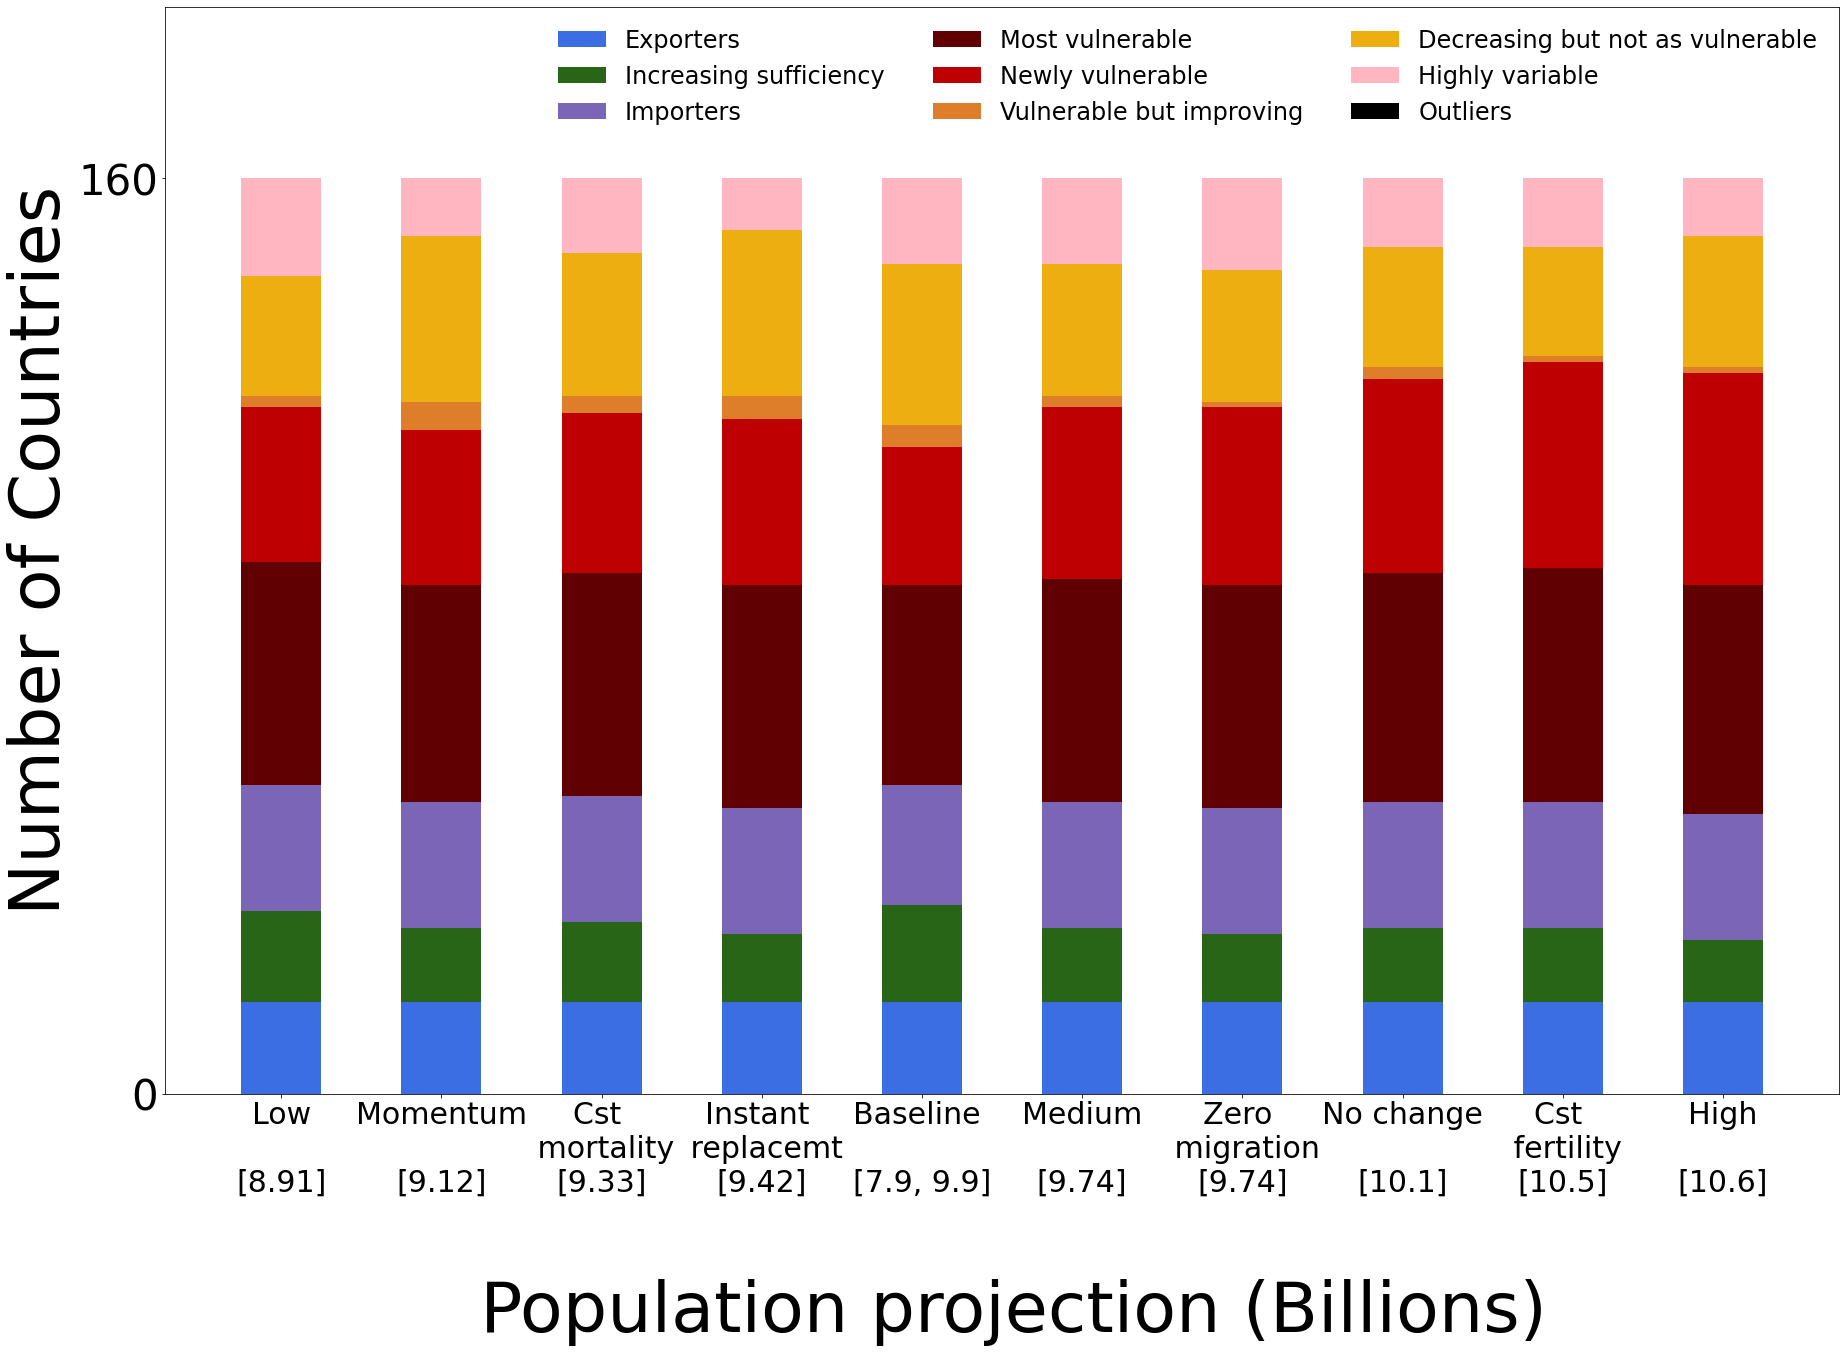

In [383]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='normal')
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

rng = []
vars_disp = ['Low\n', 'Momentum\n', 'Cst \n mortality', 'Instant \n replacemt', 'Baseline \n', 'Medium\n', 'Zero \n migration', 'No change\n', 'Cst \n fertility', 'High\n']

for var in variants:  
    if var!='Baseline':
        pop = '['+str(cnty_pops[cnty_pops['Location']=='World']['PopTotal'][var] / 1e+09)+']'
        rng.append(pop)
    else:
        rng.append('[7.9, 9.9]')
values = [str(e) + '\n' + str(r) for e, r in zip(vars_disp, rng)]

cat1 = np.array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16])
cat2 = np.array([16, 13, 14, 12, 17, 13, 12, 13, 13, 11])
cat3 = np.array([22, 22, 22, 22, 21, 22, 22, 22, 22, 22])
cat4 = np.array([39, 38, 39, 39, 35, 39, 39, 40, 41, 40])
cat5 = np.array([27, 27, 28, 29, 24, 30, 31, 34, 36, 37])
cat6 = np.array([2, 5, 3, 4, 4, 2, 1, 2, 1, 1])
cat7 = np.array([21, 29, 25, 29, 28, 23, 23, 21, 19, 23])
cat8 = np.array([17, 10, 13, 9, 15, 15, 16, 12, 12, 10])
cat9 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 20)
plt.xticks(ind, values, fontsize=30)
plt.xlabel('\n Population projection (Billions)', fontsize=70)
plt.ylim([0,190])
plt.yticks([0, 160],fontsize=42)
plt.ylabel('Number of Countries', fontsize=70)

p1 = plt.bar(ind, cat1, width, color='#3B6EE2')
p2 = plt.bar(ind, cat2, width, bottom=cat1, color='#296517')
p3 = plt.bar(ind, cat3, width, bottom=cat1+cat2, color='#7B65B6')
p4 = plt.bar(ind, cat4, width, bottom=cat1+cat2+cat3,
             color='#610002')
p5 = plt.bar(ind, cat5, width, bottom=cat1+cat2+cat3+cat4, color='#BE0003')
p6 = plt.bar(ind, cat6, width, bottom=cat1+cat2+cat3+cat4+cat5, color='#DE7E2B')
p7 = plt.bar(ind, cat7, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6, color='#EDAE12')
p8 = plt.bar(ind, cat8, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7,
             color='#FFB6C1')
p9 = plt.bar(ind, cat9, width, bottom=cat1+cat2+cat3+cat4+cat5+cat6+cat7+cat8,
             color='black')


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
                                          header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

In [221]:
l1 = all_counts[3]['ISO3']['Vulnerable but improving']# + all_counts[3]['ISO3']['Vulnerable but improving']
l2 = all_counts[8]['ISO3']['Most vulnerable']# + all_counts[8]['ISO3']['Vulnerable but improving']

# len(l2)/len(l1)
[i for i in l1 if i in l2]

['GNQ', 'MAR', 'PER']

In [387]:
variants = ['Low', 'Momentum', 'Constant mortality', 'Instant replacement', 'Baseline', 'Medium', 'Zero migration', 'No change', 'Constant fertility', 'High']
values = [1.45, 1.519, 1.533, 1., 1.585, 1.585, 1.644, 1.716, 1.723]

diets = [.23, .21, .19, .20, .23]
cnty_diets = pd.read_csv('pctLS_SSPs_Bodirsky.csv', sep=';')[['Scenario', 'Region', '2050']].set_index('Scenario')
suffices = []
all_counts = []

pivot_cols = ['values', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Highly variable',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Highly variable',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Highly variable',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Highly variable',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Highly variable',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving',
 'ssp1_global',
 'ssp2_global',
 'ssp3_global',
 'ssp4_global',
 'ssp5_global'
             ]

stacked_df = pd.DataFrame(columns=pivot_cols)
# stacked_df['values'] = values
stacked_df = stacked_df.set_index('values')

# countries = ['ESP', 'ARG', 'CHE', 'CYP', 'PRT', 'IND', 'CHN', 'MAR']
countries = ['ITA', 'BGR', 'CHE', 'JPN', 'NOR', 'ETH', 'MEX', 'PER']

for j, var in enumerate(variants):
    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        
        if var!= 'Baseline':
            idx =  var
            #calculating global caloric sufficiency
            pop = cnty_pops[cnty_pops['Location'] == 'World']['PopTotal'][var]
            stacked_df.loc[idx, pivot_cols[41+i]] = cal_suff(df_ssp, cntry=None, year=2050, \
                                                               diet=diets[i], population=pop)
            # filling each country
            for j, country in enumerate(countries):
            
                my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
                try:
                    new_name = countries_names[countries_names['ISO3']==country].name.values[0]
                    pop = cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var]
                except:
                    try:
                        new_name = countries_names[countries_names['ISO3']==country].fao_producer_prices_name.values[0]
                        pop = cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var]
                    except:
                        pop = get_population(df_ssp[df_ssp.ISO3==country]) * values[j]
                
                
                stacked_df.loc[idx, pivot_cols[8*i + j + 1]] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                      year=2050, diet=my_diet, population=pop)
        else:
            idx = 'Baseline ssp'+str(i+1)
            stacked_df.loc[idx, pivot_cols[41+i]] = cal_suff(df_ssp, cntry=None, year=2050, \
                                                               diet=diets[i])
        
            # filling for each country
            for j, country in enumerate(countries):

                my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
                stacked_df.loc[idx, pivot_cols[8*i + j + 1]] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                      year=2050, diet=my_diet)

In [389]:
re_index = [
    'Baseline ssp1',
    'Baseline ssp2',
    'Baseline ssp5',
    'Baseline ssp4',
    'Low',
    'Momentum',
    'Constant mortality',
    'Instant replacement',
    'Medium',
    'Zero migration',
    'Baseline ssp3',
    'No change',
    'Constant fertility',
    'High'
    
]
stacked_df = stacked_df.reindex(re_index)
stacked_df

,ssp1_Decreasing but not as vulnerable,ssp1_Exporters,ssp1_Highly variable,ssp1_Importers,ssp1_Increasing sufficiency,ssp1_Most vulnerable,ssp1_Newly vulnerable,ssp1_Vulnerable but improving,ssp2_Decreasing but not as vulnerable,ssp2_Exporters,...,ssp5_Importers,ssp5_Increasing sufficiency,ssp5_Most vulnerable,ssp5_Newly vulnerable,ssp5_Vulnerable but improving,ssp1_global,ssp2_global,ssp3_global,ssp4_global,ssp5_global
values,,,,,,,,,,,,,,,,,,,,,
Baseline ssp1,1.87398,4.1287,1.39288,0.998118,1.95111,0.42309,1.23763,0.736618,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.37051,NaN,NaN,NaN,NaN
Baseline ssp2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.89534,4.23796,...,NaN,NaN,NaN,NaN,NaN,NaN,1.40763,NaN,NaN,NaN
Baseline ssp5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.943213,1.44337,0.751445,1.2731,0.794967,NaN,NaN,NaN,NaN,1.42965
Baseline ssp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34731,NaN
Low,2.08295,6.14788,1.19623,1.13747,2.03233,0.378881,1.02937,0.559599,2.10732,6.31852,...,1.13947,1.77668,0.66721,1.06167,0.596223,1.22283,1.29714,1.32661,1.31903,1.32344
Momentum,1.92304,5.28959,1.26109,1.01306,2.18692,0.430604,0.900229,0.505113,1.94554,5.43641,...,1.01485,1.91182,0.758294,0.928473,0.538172,1.19468,1.26727,1.29606,1.28866,1.29297
Constant mortality,2.02088,5.95023,1.14626,1.10164,1.93867,0.362995,0.961411,0.529166,2.04452,6.11538,...,1.10359,1.6948,0.639235,0.991574,0.563799,1.16779,1.23875,1.26689,1.25965,1.26387
Instant replacement,1.72616,5.24738,1.0248,0.957869,1.76747,0.420552,0.887338,0.498393,1.74636,5.39302,...,0.959557,1.54514,0.740594,0.915178,0.531012,1.15663,1.22691,1.25478,1.24762,1.25179
Medium,1.93009,5.65762,1.10739,1.05625,1.87607,0.345473,0.932083,0.509606,1.95267,5.81466,...,1.05811,1.64008,0.608379,0.961327,0.542958,1.11863,1.1866,1.21356,1.20663,1.21067
